# Geoplot

关于geoplot，主要参考了：[geoplot: geospatial data visualization](https://residentmario.github.io/geoplot/index.html).

geoplot是一个高层的地理空间可视化库，它扩展了cartopy和matplotlib，使绘图更加方便，它和cartopy的关系类似于seaborn之于matplotlib，能起到一种补充的作用。使用它基本上要配合geopandas，因为空间数据可视化，必然要从空间数据分析开始，而geopandas就是空间数据分析中最常用的库，因此首先安装geopandas（关于geopandas的内容可以参考：[OuyangWenyu/hydroGIS/AutoGIS/lesson2.ipynb](https://github.com/OuyangWenyu/hydroGIS/blob/master/AutoGIS/lesson2.ipynb)，这里重点介绍可视化），然后再安装它：

```Shell
conda install -c conda-forge geopandas
conda install -c conda-forge geoplot
conda env export > environment.yml
```

接下来直接看例子快速了解下geoplot。

## Quick start

geopandas的geodataframe就是pandas的dataframe加上geometry属性列。

In [1]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)

In [2]:
import geopandas as gpd

In [3]:
import geoplot as gplt
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


更多关于空间数据的内容，可以参考：[Working with Geospatial Data](https://residentmario.github.io/geoplot/user_guide/Working_with_Geospatial_Data.html)。

如果数据包含很多点需要展示，那么可以使用pointplot

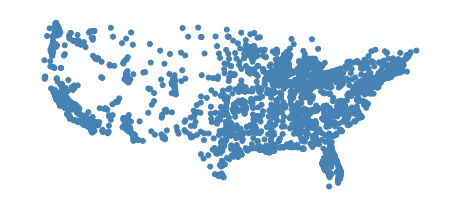

In [4]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

如果是多边形数据，那就是用polyplot：

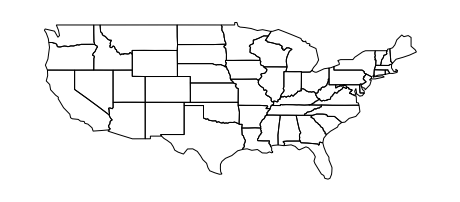

In [5]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

可以使用overplotting轻松地将上面的图形绘制到一起，这是geoplot中多图层叠加的方式。

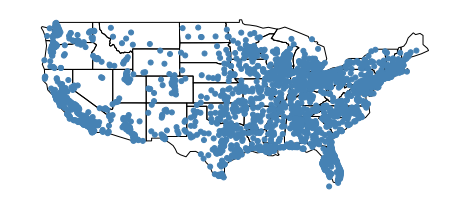

In [6]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

可以使用不同的投影来绘制地图：

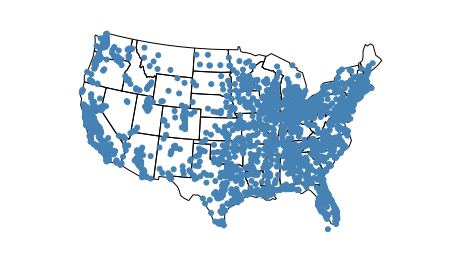

In [7]:
import geoplot.crs as gcrs

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

geoplot中可以使用webmap：

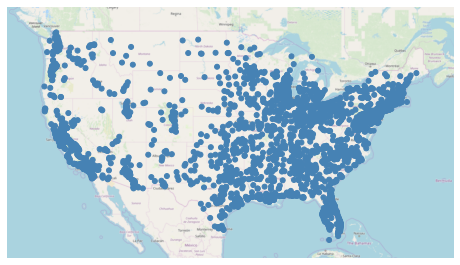

In [8]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax)

以上是一个静态的web地图，也可以做交互式的图。这个地图展示了全美的城市分布，可以看到沿海比内陆落基山脉附近的城市要多，但是还没有反映城市本身的信息。可以增加一个hue上去：

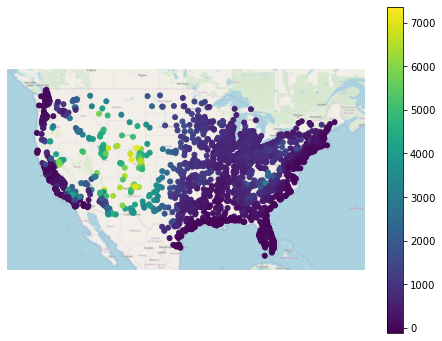

In [9]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', legend=True)

现在的地图就告诉我们了一个story，美国中部的城市有更高的ELEV_IN_FT。可以使用不同的颜色：

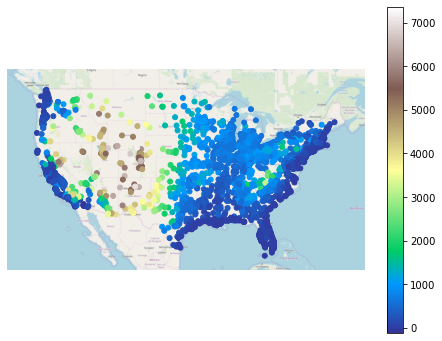

In [10]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='terrain', legend=True)

geoplot中也有很多选项可以用来调整图形的样式，比如：

Text(0.5, 1.0, 'Cities in the Continental United States by Elevation')

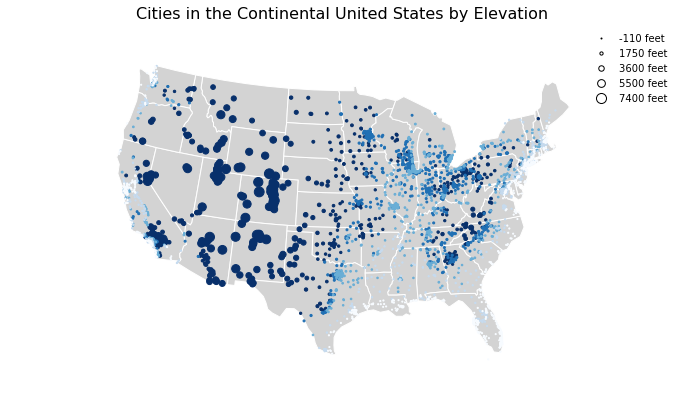

In [11]:
ax = gplt.polyplot(
    contiguous_usa, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', facecolor='lightgray',
    figsize=(12, 8)
)
gplt.pointplot(
    continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='Blues',
    scheme='quantiles',
    scale='ELEV_IN_FT', limits=(1, 10),
    legend=True, legend_var='scale',
    legend_kwargs={'frameon': False},
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=['-110 feet', '1750 feet', '3600 feet', '5500 feet', '7400 feet']
)
ax.set_title('Cities in the Continental United States by Elevation', fontsize=16)

现在看看别的图形类型：

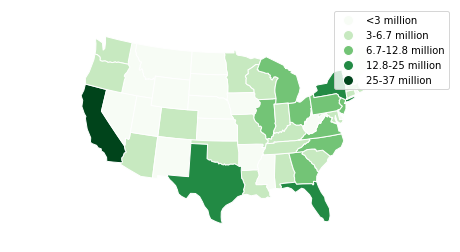

In [12]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True,
    scheme='FisherJenks',
    legend_labels=[
        '<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'
    ]
)

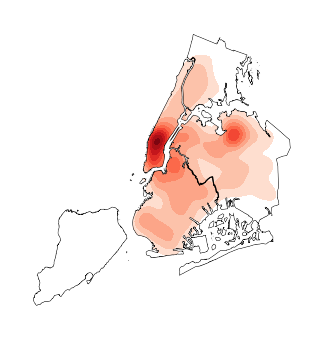

In [13]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.kdeplot(collisions, cmap='Reds', shade=True, clip=boroughs, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, zorder=1, ax=ax)

## 日常积累

这里记录根据日常所需，参考[官方gallery](https://residentmario.github.io/geoplot/gallery/index.html)的一些实例。

### 绘点于图上

先看一个官方的实例：

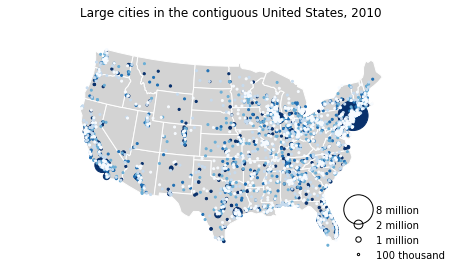

In [14]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc

continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
scheme = mc.Quantiles(continental_usa_cities['POP_2010'], k=5)

ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(8, 12)
)
gplt.pointplot(
    continental_usa_cities,
    scale='POP_2010',
    limits=(2, 30),
    hue='POP_2010',
    cmap='Blues',
    scheme=scheme,
    legend=True,
    legend_var='scale',
    legend_values=[8000000, 2000000, 1000000, 100000],
    legend_labels=['8 million', '2 million', '1 million', '100 thousand'],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    ax=ax
)


plt.title("Large cities in the contiguous United States, 2010")
plt.savefig("largest-cities-usa.png", bbox_inches='tight', pad_inches=0.1)

现在根据官方的实例，修改成自己想要的。